In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Dataset.xlsx - Sheet1.csv to Dataset.xlsx - Sheet1 (1).csv


In [ ]:
import pandas as pd

In [ ]:
import IPython
import numpy as np
import wave
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from pandas.core.internals.managers import T

In [ ]:
d=pd.read_csv(r"Dataset.xlsx - Sheet1.csv")
d.head()
d.shape

(10683, 11)

In [ ]:
cat_cols = d.select_dtypes(include=['object']).columns.tolist()
cat_cols

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
t=list(d["Date_of_Journey"])
t
d["date"]=d["Date_of_Journey"]
d["month"]=d["Date_of_Journey"]
j=0
for i in range(d.shape[0]):
    d["date"][i]=d["date"][i].split('/')[0]
    d["month"][i]=d["month"][i].split('/')[1]
   
d.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


In [ ]:
d["dep_hr"]=pd.to_datetime(d["Dep_Time"]).dt.hour
d["dep_min"]=pd.to_datetime(d["Dep_Time"]).dt.minute

In [ ]:
d["arrival_hr"]=pd.to_datetime(d["Arrival_Time"]).dt.hour
d["arrival_min"]=pd.to_datetime(d["Arrival_Time"]).dt.minute
#d.drop(["Arrival_Time"],axis=1,inplace=True)

In [ ]:
duration = list(d["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]    

In [ ]:
#duration_hours = []
#duration_mins = []
#for i in range(len(duration)):
#    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
#    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [ ]:
#d["duration_hours"] = duration_hours
#d["duration_mins"] = duration_mins

In [ ]:
d["duration_hour"]=d["Duration"]
#d["duration_mins"]=d["Duration"]

for i in range(d.shape[0]):
    d["duration_hour"][i]=d["Duration"][i].split(sep = "h")[0]
#    d["duration_mins"][i]=d["Duration"][i].split(sep = "m")[0].split()[-1]
#d.drop(['duration_mins'],axis=1,inplace=True)

In [ ]:
d.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20,1,10,2
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,5,50,13,15,7
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,9,25,4,25,19
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,18,5,23,30,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,16,50,21,35,4


#EDA

In [ ]:
import seaborn as sb

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

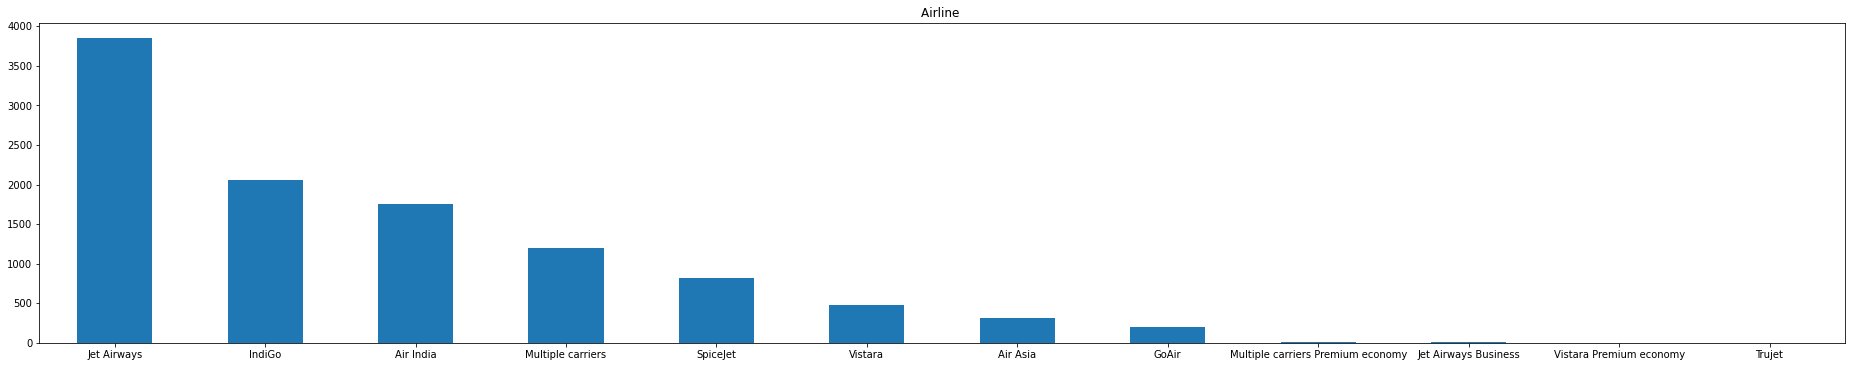

In [ ]:
plt.subplot(331)

d['Airline'].value_counts().plot(kind='bar', title='Airline ', figsize=(110,20))
plt.xticks(rotation=0)


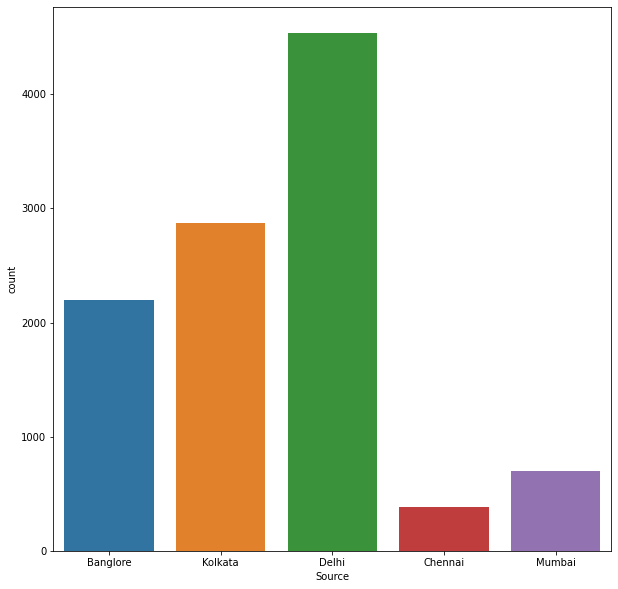

In [ ]:
sb.countplot(x='Source',data=d)

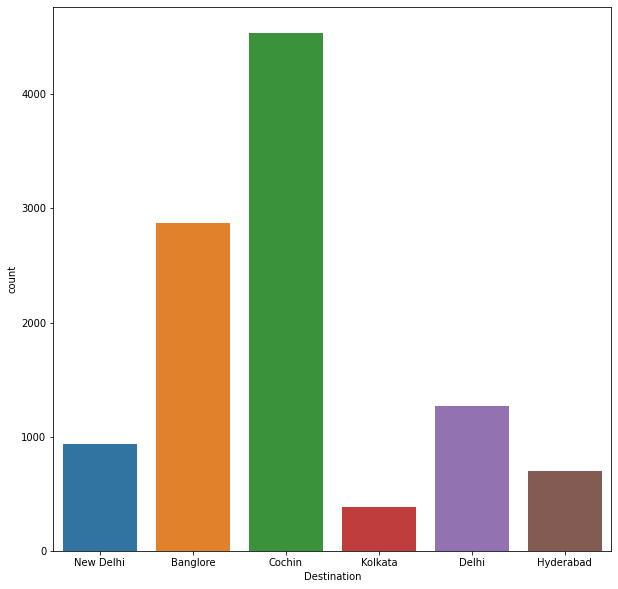

In [ ]:
sb.countplot(x='Destination',data=d)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

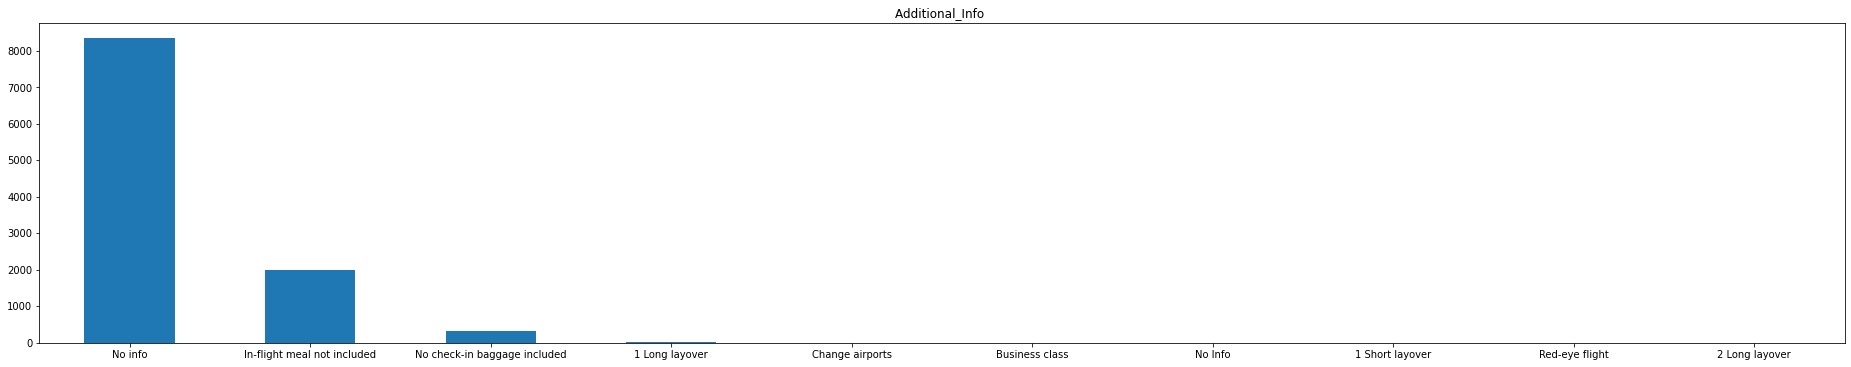

In [ ]:
plt.subplot(331)

d['Additional_Info'].value_counts().plot(kind='bar', title='Additional_Info ', figsize=(110,20))
plt.xticks(rotation=0)

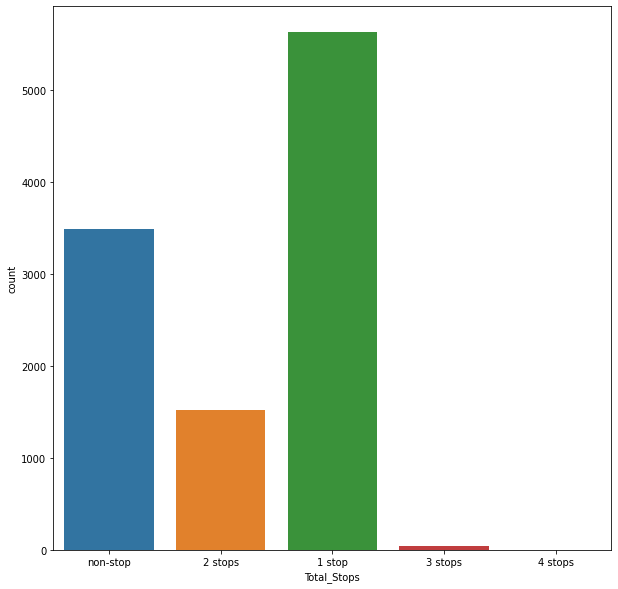

In [ ]:
sb.countplot(x='Total_Stops',data=d)

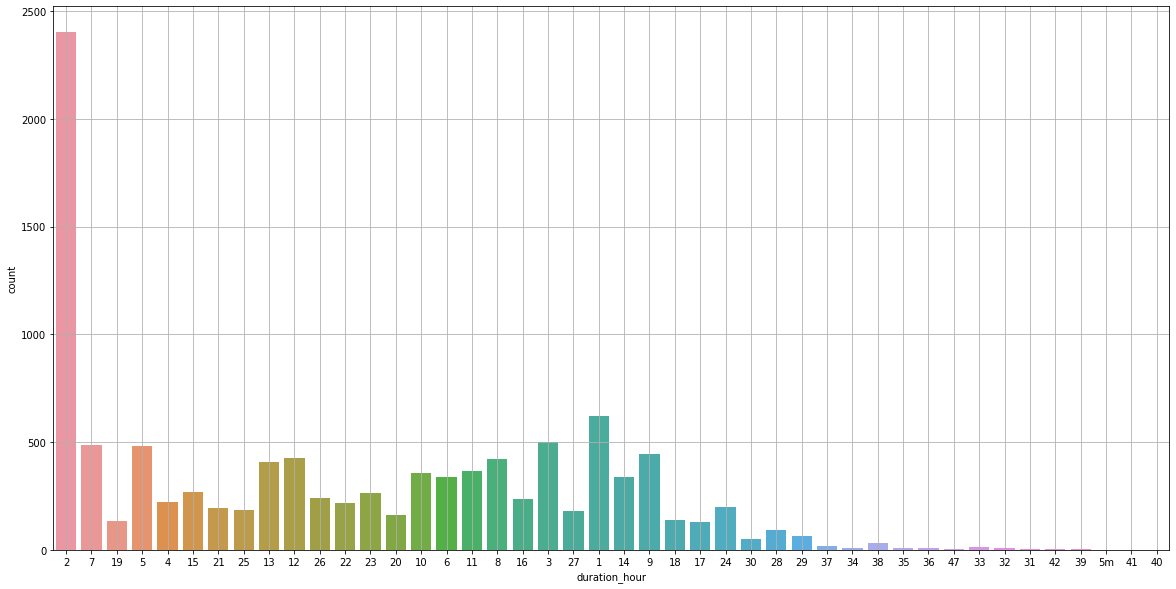

In [ ]:
plt.figure(figsize=(20,10))
sb.countplot(x='duration_hour',data=d)
plt.grid()

In [ ]:
#plt.figure(figsize=(20,10))
#sb.countplot(x='duration_mins',data=d)
#plt.grid()

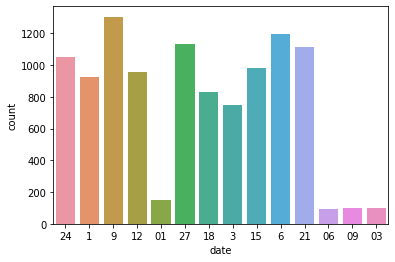

In [ ]:
sb.countplot(x='date',data=d)

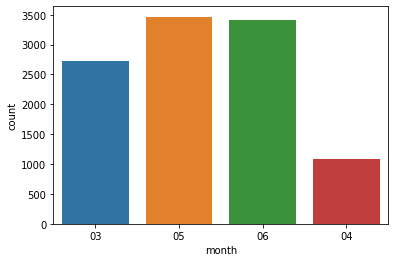

In [ ]:
sb.countplot(x='month',data=d)

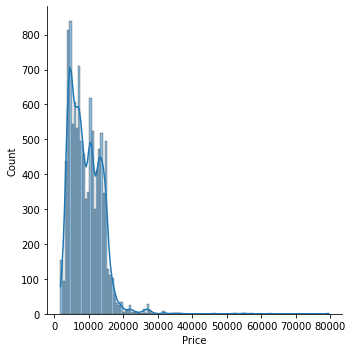

In [ ]:
sb.displot(d['Price'],kde='False')

Comparision

In [ ]:
import seaborn as sns

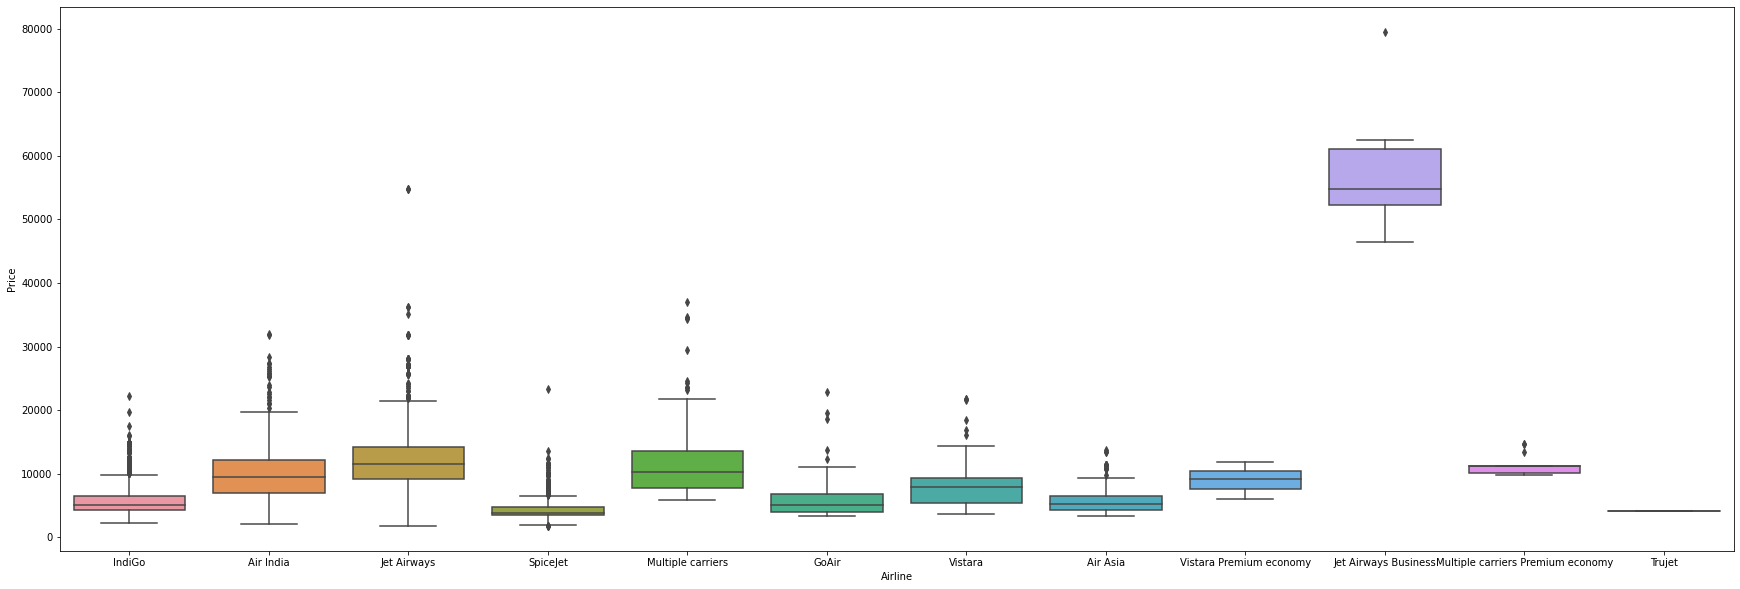

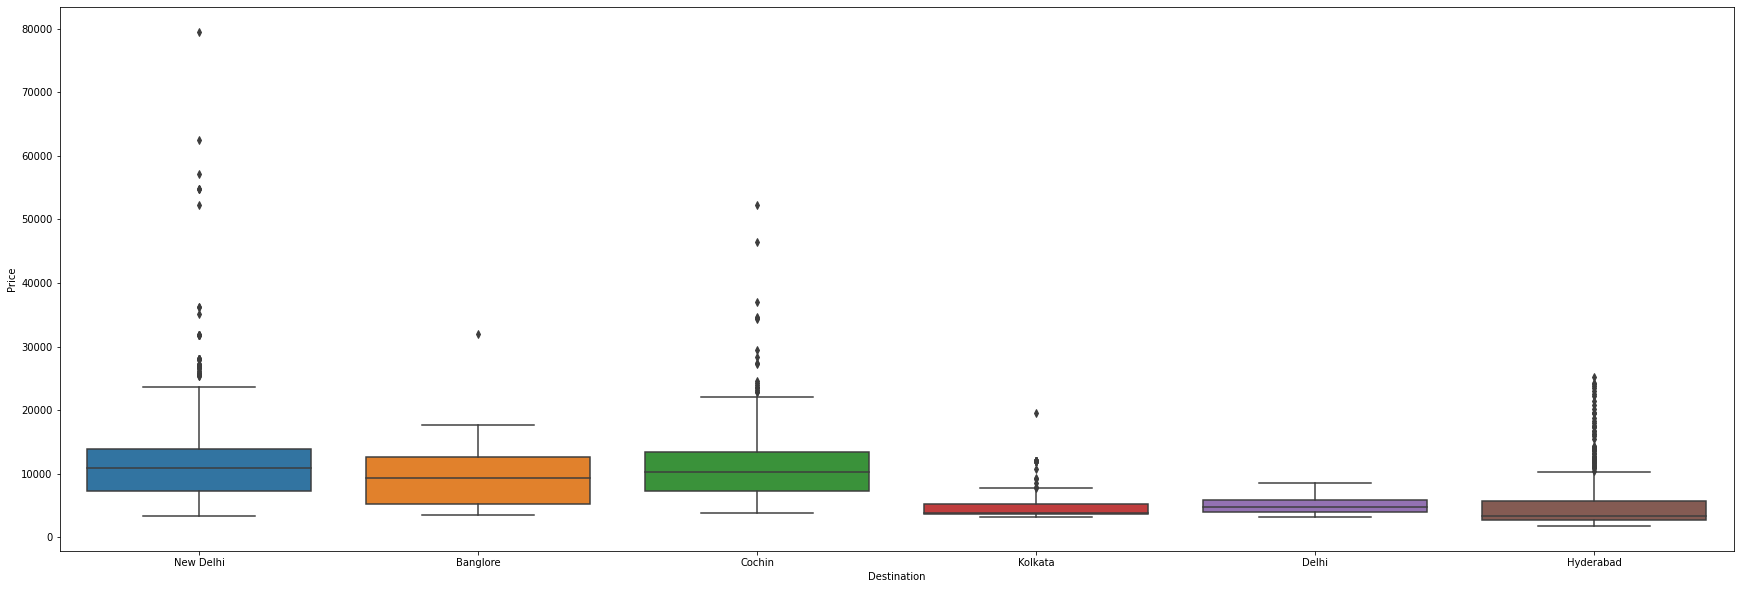

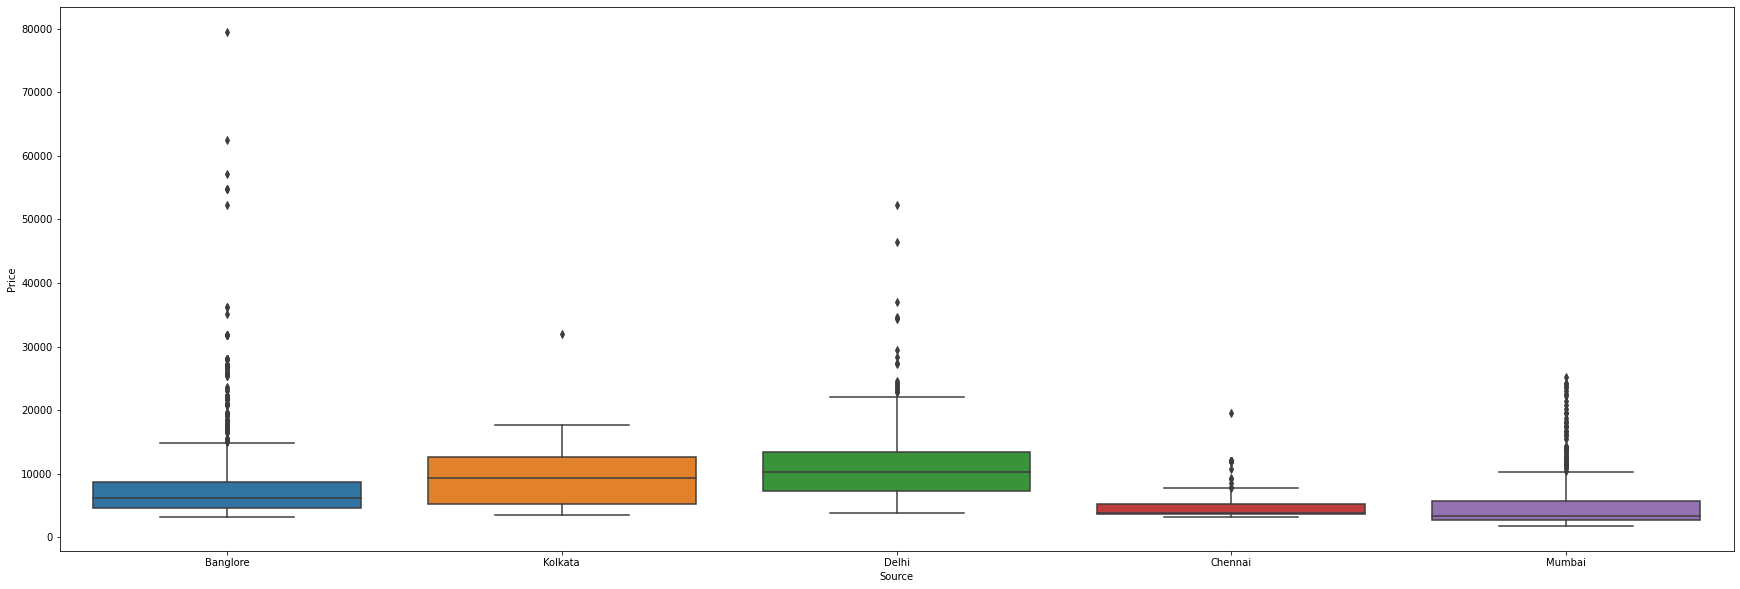

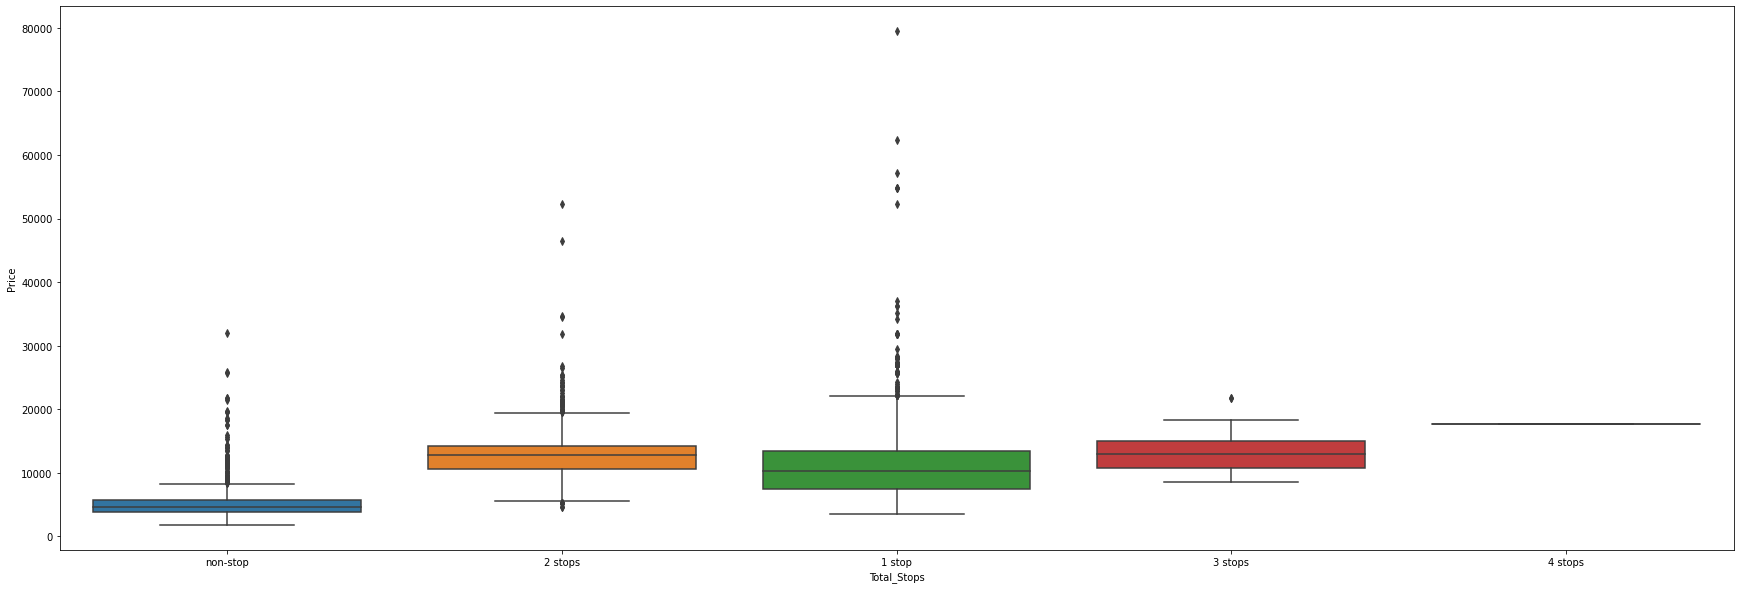

In [ ]:
#fig, axes = plt.subplots(2,2, figsize=(50,9))
plt.figure(figsize=(30,10))
sns.boxplot( y="Price", x= "Airline", data=d, orient='v')
plt.figure(figsize=(30,10))
sns.boxplot( y="Price", x= "Destination", data=d, orient='v')
plt.figure(figsize=(30,10))
sns.boxplot( y="Price", x= "Source", data=d, orient='v' )
plt.figure(figsize=(30,10))
sns.boxplot( y="Price", x= "Total_Stops", data=d, orient='v')
plt.show()

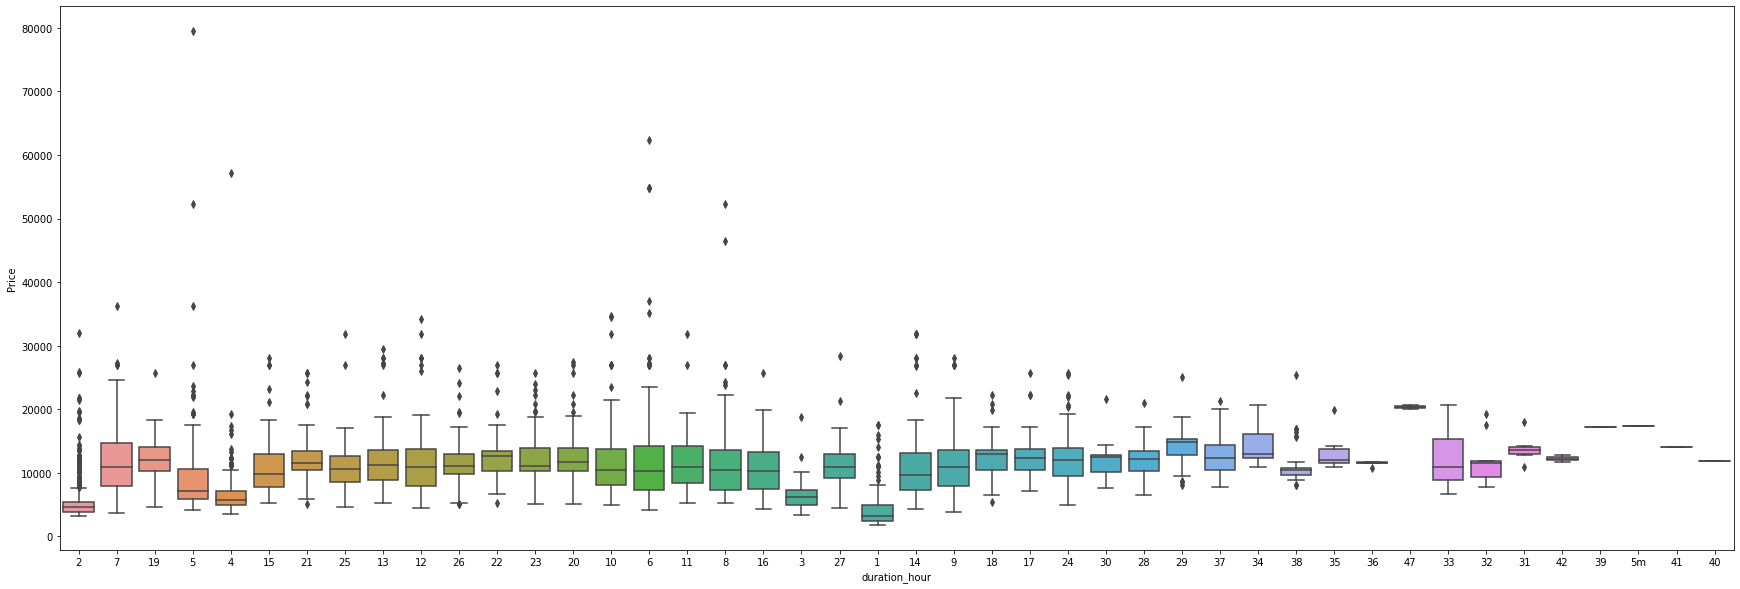

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot( y="Price", x= "duration_hour", data=d, orient='v')
plt.show()
#plt.figure(figsize=(30,10))
#sns.boxplot( y="Price", x= "duration_mins", data=d, orient='v')
#plt.show()

In [ ]:
d['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [ ]:
d['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [ ]:
d['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [ ]:
print(d["Source"].unique())
print(d["Destination"].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [ ]:
d.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hour
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20,1,10,2
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,5,50,13,15,7
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,9,25,4,25,19
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,18,5,23,30,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,16,50,21,35,4


In [ ]:
d['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables

t1=d[['Airline']]
t1=pd.get_dummies(t1, drop_first=True)

t2=d[['Source']]
t2=pd.get_dummies(t2, drop_first= True)

t3=d[['Destination']]
t3=pd.get_dummies(t3, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
d= pd.concat([d, t1, t2, t3], axis = 1)



In [ ]:
l=LabelEncoder()
d['Route']=l.fit_transform(d['Route'])
d['Total_Stops']=l.fit_transform(d['Total_Stops'])
d['Additional_Info']=l.fit_transform(d['Additional_Info'])
d['number_stops']=d['Total_Stops']
d['route']=d['Route']
d['info']=d['Additional_Info']

In [ ]:
d['Total_Stops'].unique()

array([4, 1, 0, 2, 5, 3])

In [ ]:
#d["source"]=d["Source"]
##d.replace({"Banglore":1,"Kolkata":2,"Delhi":3,"Chennai":4,"Mumbai":5},inplace=True)
#d.head()
#d["destination"]=d["Destination"]
#d.replace({"Banglore":1,"Kolkata":2,"Delhi":3,"Chennai":4,"Mumbai":5,"New Delhi":6,"Cochin":7,"Delhi":8,"Hyderabad":9},inplace=True)

In [ ]:
#d["journey_data"]=d["Date_of_Journey"] /////////////////////////
d.drop(["Airline"],axis=1,inplace=True)
d.drop(["Date_of_Journey"],axis=1,inplace=True)
d.drop(["Source"],axis=1,inplace=True)
d.drop(["Destination"],axis=1,inplace=True)
d.drop(["Route"],axis=1,inplace=True)
d.drop(["Dep_Time"],axis=1,inplace=True)
d.drop(["Duration"],axis=1,inplace=True)
d.drop(["Total_Stops"],axis=1,inplace=True)
d.drop(["Arrival_Time"],axis=1,inplace=True)
d.drop(["Additional_Info"],axis=1,inplace=True)

In [ ]:
d.head()

,Price,date,month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hour,Airline_Air India,Airline_GoAir,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,number_stops,route,info
0,3897,24,03,22,20,1,10,2,0,0,...,0,0,0,0,0,0,1,4,18,8
1,7662,1,05,5,50,13,15,7,1,0,...,1,0,0,0,0,0,0,1,84,8
2,13882,9,06,9,25,4,25,19,0,0,...,0,0,1,0,0,0,0,1,118,8
3,6218,12,05,18,5,23,30,5,0,0,...,1,0,0,0,0,0,0,0,91,8
4,13302,01,03,16,50,21,35,4,0,0,...,0,0,0,0,0,0,1,0,29,8


In [ ]:
x=d.iloc[:,1:]
y=d.iloc[:,0]
x.isna().sum()

date                                         0
month                                        0
dep_hr                                       0
dep_min                                      0
arrival_hr                                   0
arrival_min                                  0
duration_hour                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Price                                      10683 non-null  int64 
 1   date                                       10683 non-null  object
 2   month                                      10683 non-null  object
 3   dep_hr                                     10683 non-null  int64 
 4   dep_min                                    10683 non-null  int64 
 5   arrival_hr                                 10683 non-null  int64 
 6   arrival_min                                10683 non-null  int64 
 7   duration_hour                              10683 non-null  object
 8   Airline_Air India                          10683 non-null  uint8 
 9   Airline_GoAir                              10683 non-null  uint8 
 10  Airline_IndiGo                    

In [ ]:
c=d.select_dtypes(include=['object']).columns.tolist()
c
#for i in c:
#  d[i]=d[i].astype(str).astype(int)
for i in c:
  #l=LabelEncoder()
  d[i]=l.fit_transform(d[i])
  #d[i]=d[i].astype(str)#.astype(int)
d.head()

,Price,date,month,dep_hr,dep_min,arrival_hr,arrival_min,duration_hour,Airline_Air India,Airline_GoAir,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,number_stops,route,info
0,3897,9,0,22,20,1,10,11,0,0,...,0,0,0,0,0,0,1,4,18,8
1,7662,4,2,5,50,13,15,41,1,0,...,1,0,0,0,0,0,0,1,84,8
2,13882,13,3,9,25,4,25,10,0,0,...,0,0,1,0,0,0,0,1,118,8
3,6218,5,2,18,5,23,30,38,0,0,...,1,0,0,0,0,0,0,0,91,8
4,13302,0,0,16,50,21,35,33,0,0,...,0,0,0,0,0,0,1,0,29,8


In [ ]:
x=d.iloc[:,1:]
y=d.iloc[:,0]
#x.isna().sum()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8546, 30)
(8546,)
(2137, 30)
(2137,)


#Modules

In [ ]:
# Importing different models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
from pandas.core.strings.accessor import forbid_nonstring_types
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import sklearn
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import impute 

#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

#KNN means

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

Grid search to get best value of k

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

m = GridSearchCV(knn, params, cv=5)
m.fit(x_train,y_train)
m.best_params_

{'n_neighbors': 4}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(x_train, y_train)
knc

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicting the Test set results
y_pred1 = knc.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_pred1)
accu1 = accuracy_score(y_test, y_pred1)
print("confusion matrix:",conf)
print("accuracy:",accu1*100)

confusion matrix: [[0 0 0 ... 0 0 0]
 [1 4 2 ... 0 0 0]
 [1 4 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy: 42.34908750584932


In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred1 ,average='macro')
print("f1_score:",f1)

f1_score: 0.15304879901401283


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         0
        1965       0.40      0.57      0.47         7
        2017       0.50      0.40      0.44        10
        2050       0.17      0.33      0.22         3
        2175       0.00      0.00      0.00         2
        2227       0.67      0.46      0.55        13
        2228       0.00      0.00      0.00         2
        2385       0.00      0.00      0.00         0
        2437       0.00      0.00      0.00         3
        2575       0.00      0.00      0.00         2
        2647       1.00      0.33      0.50         3
        2753       0.60      1.00      0.75         3
        2754       0.47      0.80      0.59        10
        2759       0.00      0.00      0.00         1
        3100       0.71      0.86      0.77        14
        3145       0.00      0.00      0.00         0
        3175       0.60      0.60      0.60         5
        3210       0.60    

In [ ]:
mse1 =mean_squared_error(y_test,y_pred1)
print('MSE : ',mse1)
r2_1= metrics.r2_score(y_test, y_pred1)
print('r2_score :',r2_1)
rmse1=np.sqrt(mean_squared_error(y_test,y_pred1))
print('RMSE : ', rmse1)

MSE :  7183234.576041179
r2_score : 0.6708842341958543
RMSE :  2680.155699962444


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#Linear regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
kfold = StratifiedKFold(n_splits=20)


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred2=lr.predict(x_test)

#training score
print("Linear Regression Score for training set ",lr.score(x_train, y_train))
#test score
print("Linear Regression Score for test Set ",lr.score(x_test, y_test))

acc = cross_val_score(lr, x_train, y_train, cv = kfold)
#print(accuracies)
print("Accuracy: {:.2f} %".format(acc.mean()*100))




Linear Regression Score for training set  0.6231783846366856
Linear Regression Score for test Set  0.5858521110722366
Accuracy: -14846003451423340923715584.00 %


In [ ]:
mse2 =mean_squared_error(y_test,y_pred2)
print('MSE : ',mse1)
r2_2= metrics.r2_score(y_test, y_pred2)
print('r2_score :',r2_2)
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
print('RMSE : ', rmse2)

MSE :  7183234.576041179
r2_score : 0.5858521110722366
RMSE :  3006.515221540578


#Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=44)
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)

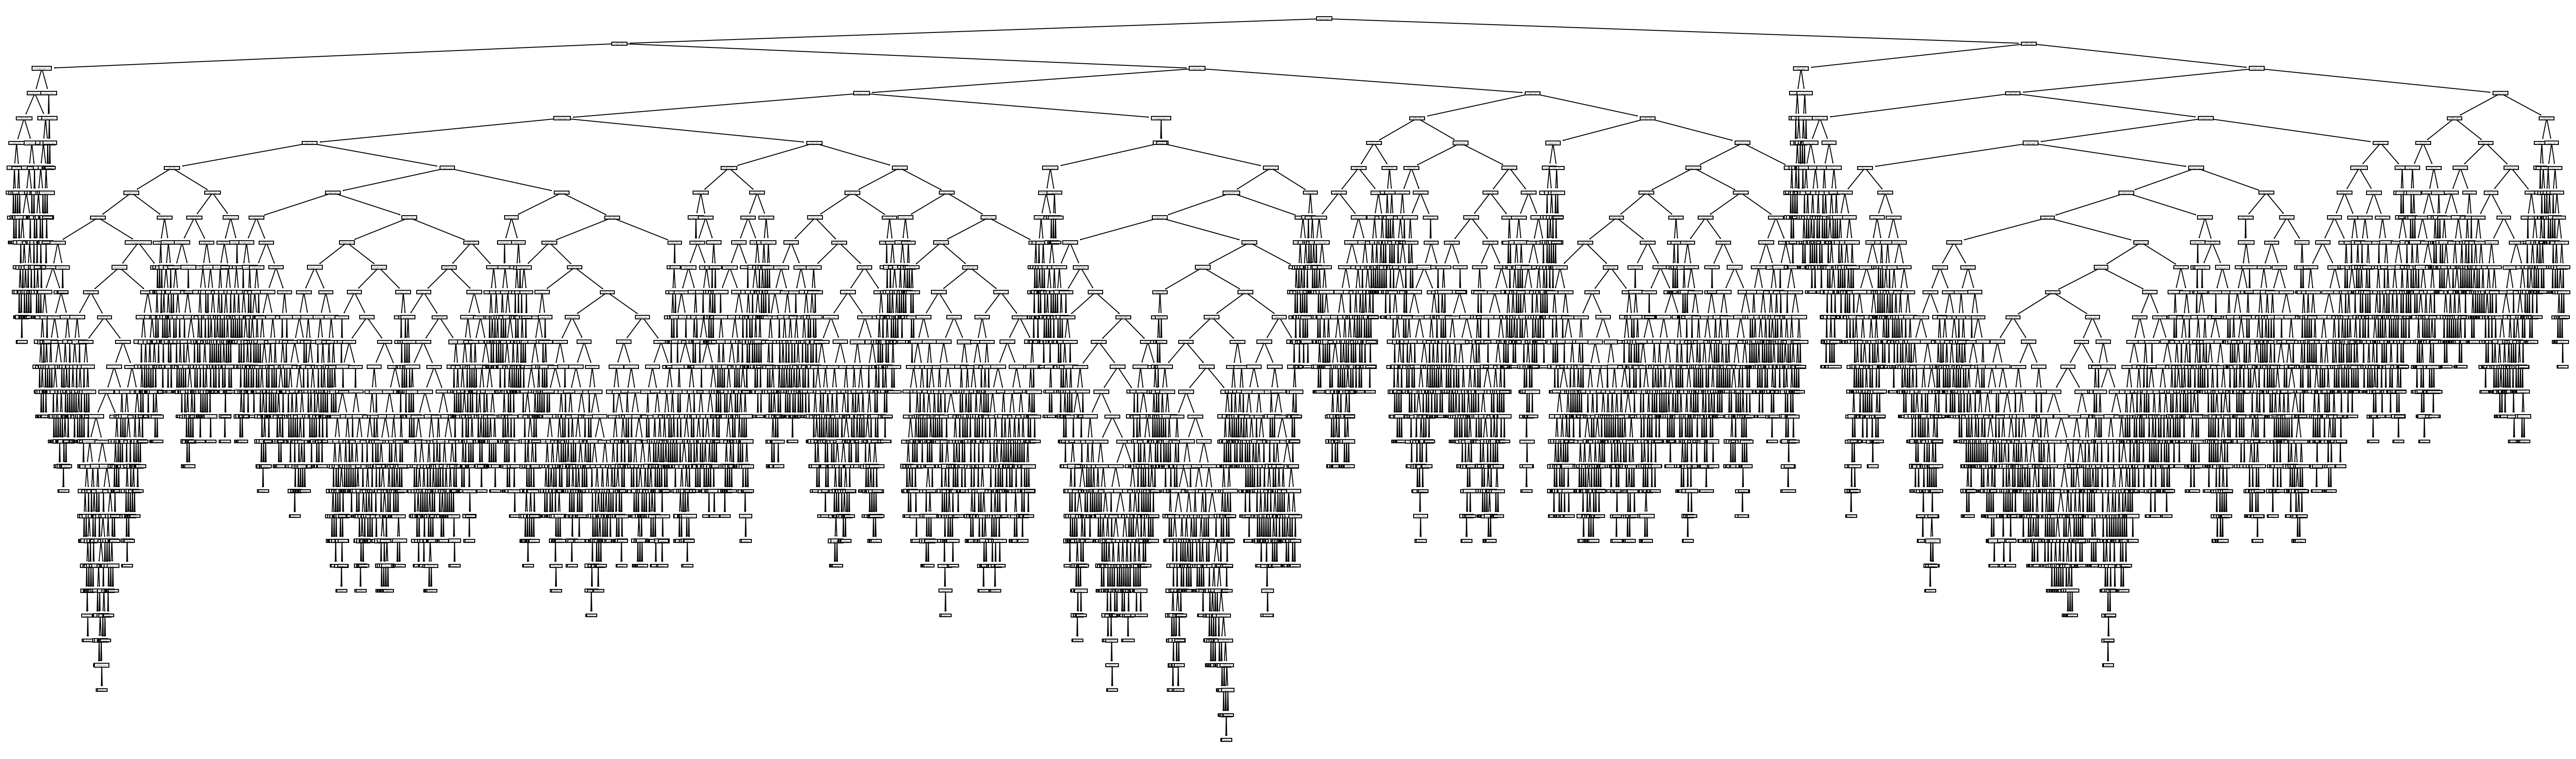

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,15), dpi=150)
plot_tree(dt, feature_names=x.columns);

In [ ]:

#Training Accuracy
print("Decision Tree Score on Training set is",dt.score(x_train, y_train))
#Testing Accuracy
print("Decision Tree Score on Test Set is",dt.score(x_test, y_test))

acc3 = cross_val_score(dt, x_train, y_train, cv = kfold)
#print(acc)
print("Accuracy: {:.2f} %".format(acc3.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc3.std()*100))


Decision Tree Score on Training set is 0.9958580250876276
Decision Tree Score on Test Set is 0.806335999003908
Accuracy: 83.56 %
Standard Deviation: 6.26 %


In [ ]:
mse3 =mean_squared_error(y_test,y_pred3)
print('MSE : ',mse3)
r2_3= metrics.r2_score(y_test, y_pred3)
print('r2_score:',r2_3)
rmse3=np.sqrt(mean_squared_error(y_test,y_pred3))
print('RMSE : ', rmse3)

MSE :  4226883.34206832
r2_score: 0.806335999003908
RMSE :  2055.9385550323045


#Random regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
rg = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rg.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [ ]:
y_pred4 = rg.predict(x_test)
y_pred4

array([ 7851.99      , 13610.4       , 10472.9       , ...,
        6853.36966667,  8232.26      ,  3679.32      ])

In [ ]:
acc4 = cross_val_score(dt, x_train, y_train, cv = kfold)
#print(acc)
print("Accuracy: {:.2f} %".format(acc4.mean()*100))
print("Standard Deviation: {:.2f} %".format(acc4.std()*100))

Accuracy: 83.56 %
Standard Deviation: 6.26 %


In [ ]:
mse4 =mean_squared_error(y_test,y_pred4)
print('MSE : ',mse4)
r2_4= metrics.r2_score(y_test, y_pred4)
print('r2_score:',r2_4)
rmse4=np.sqrt(mean_squared_error(y_test,y_pred4))
print('RMSE : ', rmse4)

MSE :  2837498.1148540354
r2_score: 0.8699937534891591
RMSE :  1684.4874932317057


Model comparission

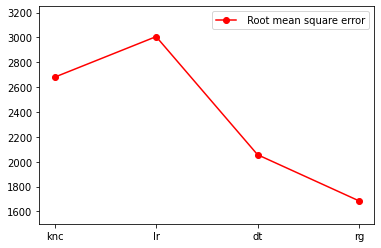

In [ ]:
x = ['knc','lr','dt','rg']
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs

y1 = [np.sqrt(mean_squared_error(y_test,y_pred1)),np.sqrt(mean_squared_error(y_test,y_pred2)),np.sqrt(mean_squared_error(y_test,y_pred3)),np.sqrt(mean_squared_error(y_test,y_pred4))]


plt.plot(x,y1,color = 'red', marker = 'o', label = ' Root mean square error')


plt.legend(loc = "best")
plt.ylim(1500,3250)

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()

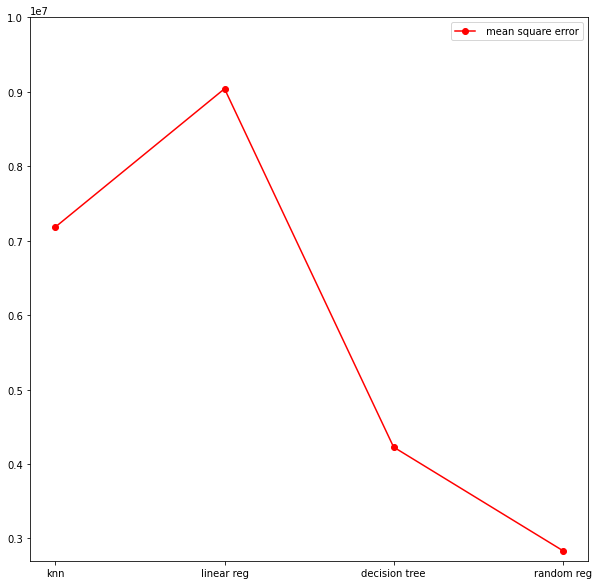

In [ ]:
x = ['knn','linear reg','decision tree','random reg']
y2 = [mean_squared_error(y_test,y_pred1),mean_squared_error(y_test,y_pred2),mean_squared_error(y_test,y_pred3),mean_squared_error(y_test,y_pred4)]
plt.plot(x,y2,color = 'red', marker = 'o', label = ' mean square error')


plt.legend(loc = "best")
plt.ylim(2700000,10000000)

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()

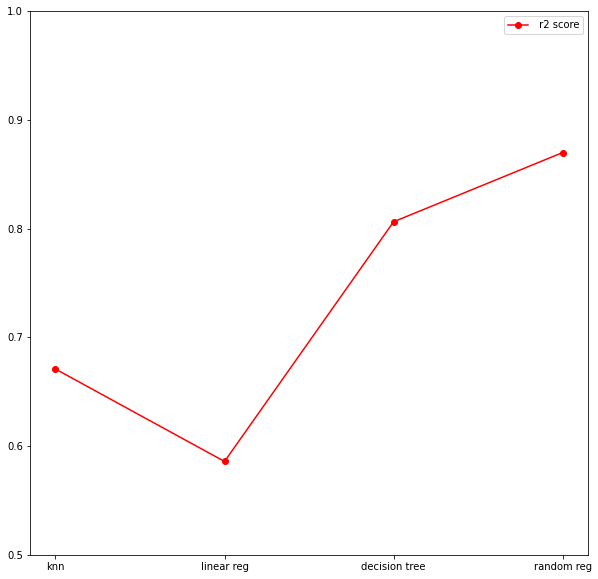

In [ ]:
y3 = [metrics.r2_score(y_test, y_pred1),metrics.r2_score(y_test, y_pred2),metrics.r2_score(y_test, y_pred3),metrics.r2_score(y_test, y_pred4)]
#y4 = [f1_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4) ]
plt.plot(x,y3,color = 'red', marker = 'o', label = ' r2 score')
#plt.plot(x,y3,color = 'blue', marker = 'o', label = 'Accuracy')

plt.legend(loc = "best")
plt.ylim(0.5,1)

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,10]

plt.show()


#metrics.r2_score(y_test, y_pred1)